In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv
import numpy as np
from datetime import datetime

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [137]:
results = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/experiment_2_2_results.csv', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [138]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/experiment_2_logs.csv', error_bad_lines=False)
data = data.drop(columns=data.columns[17:])
data = data[['timeStamp','elapsed','label','success']]
subset = data[['timeStamp','elapsed']].apply(pd.to_numeric, errors='coerce').dropna()
subset['label'] = data[['label']]
subset['timeStamp'] = (subset['timeStamp']*1000000).astype(np.int64)
subset['toDate'] = pd.to_datetime(subset['timeStamp'], format="%Y-%m-%d %H:%M:%S.%f", errors='coerce')
subset['datetime'] = subset['toDate']
subset = subset.set_index('toDate')
subset = subset[subset.index.notna()]
subset = subset.loc['2022', ["elapsed","label","datetime"]]
subset = subset[~(subset['elapsed'] >= 17500)]
subset = subset.loc[subset.elapsed.isin(subset.elapsed.nlargest(n=108734))]
subset['func_counts'] = subset['label'].map(subset['label'].value_counts())
subset = subset.loc[subset['func_counts'].isin(subset['func_counts'].nlargest(n=1).tolist())]
subset = subset[20000:20000+len(results)]
subset['counter'] = range(1,len(subset)+1)
subset = subset.set_index('counter')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0, 0.5, 'Execution time (ms)')

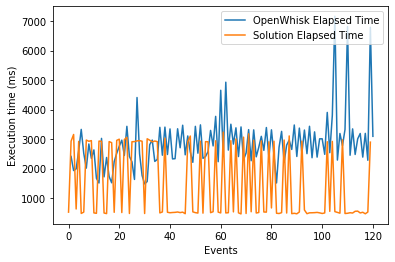

In [131]:
#subset['mean'] = subset['elapsed'].mean()
#subset['std'] = subset['elapsed'].std()
#results['mean'] = results['elapsed'].mean()
#results['std'] = results['elapsed'].std()

#plt.plot(subset['mean'][:100],label="OpenWhisk Mean Time")
#plt.plot(subset['std'][:100],label="OpenWhisk Std Time")
#plt.plot(results['mean'][:100],label="Solution Mean Time")
#plt.plot(results['std'][:100],label="Solution Std Time")

plt.plot(subset['elapsed'][:120],label="OpenWhisk Elapsed Time")
plt.plot(results['elapsed'][:120],label="Solution Elapsed Time")
plt.legend(loc="upper right")
plt.xlabel('Events')
plt.ylabel('Execution time (ms)')

In [146]:
def interQuartile(df_):
  for x in ['OpenWhisk']:
      q75,q25 = np.percentile(df_.loc[:,x],[75,25])
      intr_qr = q75-q25
  
      max = q75+(1.5*intr_qr)
      min = q25-(1.5*intr_qr)
  
      df_.loc[df_[x] < min,x] = np.nan
      df_.loc[df_[x] > max,x] = np.nan

  df_ = df_.dropna(axis = 0)
  df_.isnull().sum()
  return df_

OpenWhisk Mean: 2796.0944838126993
OpenWhisk Std: 1175.8172711684695
Solution Mean: 2001.5060441850771
Solution Std: 1210.7615070201555


Text(0, 0.5, 'Execution time (ms)')

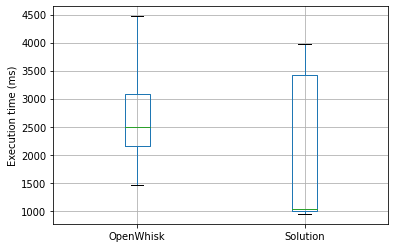

In [147]:
print("OpenWhisk Mean: "+str(subset['elapsed'].mean()))
print("OpenWhisk Std: "+str(subset['elapsed'].std()))
print("Solution Mean: "+str(results['elapsed'].mean()))
print("Solution Std: "+str(results['elapsed'].std()))
box = pd.DataFrame({"OpenWhisk":subset['elapsed'],"Solution":results['elapsed']})
box = interQuartile(box)
box = interQuartile(box)
box = interQuartile(box)
box.boxplot(['OpenWhisk','Solution'])
plt.ylabel('Execution time (ms)')

Text(0.5, 0, 'Execution Type')

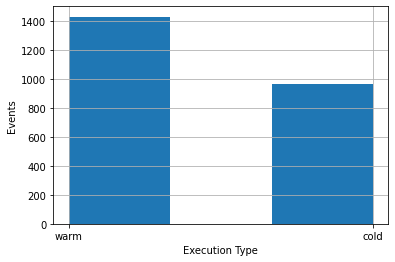

In [140]:
hist = results.state.hist(bins=3)
hist.set_ylabel("Events")
hist.set_xlabel("Execution Type")

In [141]:
subset.elapsed.describe()

count    2399.000000
mean     2796.094484
std      1175.817271
min      1464.666667
25%      2194.666667
50%      2538.000000
75%      3215.666667
max      9862.000000
Name: elapsed, dtype: float64

In [143]:
results.elapsed.describe()

count    2399.000000
mean     2001.506044
std      1210.761507
min       944.000000
25%       995.000000
50%      1030.000000
75%      3429.000000
max      3976.000000
Name: elapsed, dtype: float64

In [148]:
results.state.describe()

count     2399
unique       2
top       warm
freq      1432
Name: state, dtype: object